## **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization


from tensorflow.keras.utils import to_categorical

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns # for confusion matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import json
import os
import numpy as np

2024-06-05 13:58:01.966833: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 13:58:01.969819: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 13:58:02.039654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 13:58:03.637110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## **Load Dataset**

In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


## **Visualization**

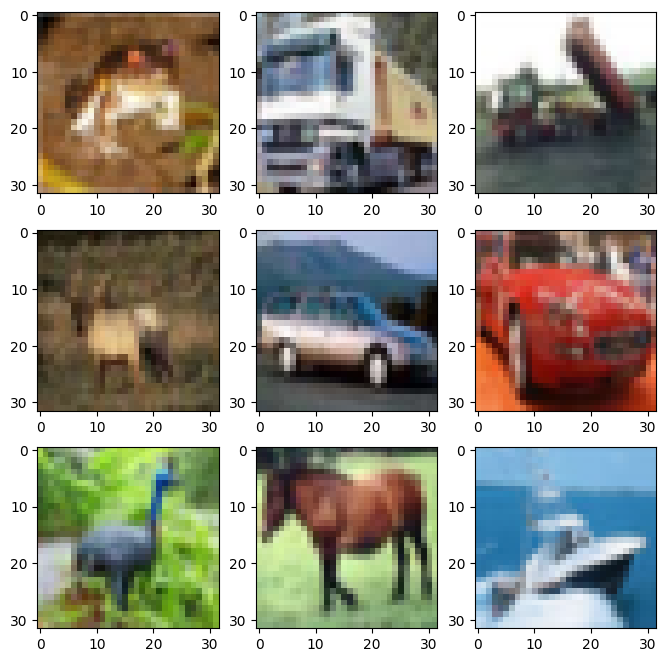

In [4]:
# create a grid of 3x3 images
plt.figure(figsize=(8,8))
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = x_train[i]
    plt.imshow(img)

# show the plot
plt.show()

## **Preprocess and Splitting**

In [5]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

In [6]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

In [7]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(50000, 32, 32, 3)
(50000, 10)
(5000, 10)
(5000, 10)


## **Graph**

In [9]:
def results(model):
  epoch = 50

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.savefig("Classification Accuracy")
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.savefig("Model loss")
  plt.show()

##**Model**

In [10]:
division_factor = 4
weight_decay = 1e-4
model = Sequential([
                    Conv2D(64//division_factor, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
                    BatchNormalization(),
                    Conv2D(64//division_factor, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),

                    Conv2D(128//division_factor, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(128//division_factor, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),

                    Conv2D(256//division_factor, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(256//division_factor, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.4),

                    Flatten(),
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
])

model.summary()

/home/hashem/ML-KnowledgeDistillation/Venv/lib64/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-05 13:58:25.330095: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 338,970 (1.29 MB)

 Trainable params: 338,010 (1.29 MB)

 Non-trainable params: 960 (3.75 KB)

In [11]:
opt =    tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss',
                                patience=10,
                                cooldown=1,
                                verbose=1),
              EarlyStopping(monitor='val_loss',
                            min_delta=1e-4,
                            patience=15)]

In [13]:
epoch = 50
history = model.fit(datagen.flow(x_train , y_train , batch_size = 64), epochs = epoch, steps_per_epoch=len(x_train)//64, validation_data = (x_val , y_val) , verbose = 1, callbacks=callbacks)

Epoch 1/50


/home/hashem/ML-KnowledgeDistillation/Venv/lib64/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 111s 132ms/step - accuracy: 0.2824 - loss: 2.3234 - val_accuracy: 0.4936 - val_loss: 1.4051 - learning_rate: 0.0010
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:50 142ms/step - accuracy: 0.5000 - loss: 1.4588

2024-06-05 14:00:16.880017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib64/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5000 - loss: 1.4588 - val_accuracy: 0.4948 - val_loss: 1.3986 - learning_rate: 0.0010
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 108s 137ms/step - accuracy: 0.4754 - loss: 1.4621 - val_accuracy: 0.5896 - val_loss: 1.2022 - learning_rate: 0.0010
Epoch 4/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:38 126ms/step - accuracy: 0.5312 - loss: 1.2222

2024-06-05 14:02:07.746219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5312 - loss: 1.2222 - val_accuracy: 0.5914 - val_loss: 1.1916 - learning_rate: 0.0010
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 159s 204ms/step - accuracy: 0.5507 - loss: 1.2827 - val_accuracy: 0.5912 - val_loss: 1.2185 - learning_rate: 0.0010
Epoch 6/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:47 215ms/step - accuracy: 0.5312 - loss: 1.2936

2024-06-05 14:04:50.566514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5312 - loss: 1.2936 - val_accuracy: 0.6028 - val_loss: 1.1887 - learning_rate: 0.0010
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 170s 216ms/step - accuracy: 0.5915 - loss: 1.1664 - val_accuracy: 0.6616 - val_loss: 0.9823 - learning_rate: 0.0010
Epoch 8/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:31 194ms/step - accuracy: 0.6406 - loss: 1.1446

2024-06-05 14:07:45.759675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6406 - loss: 1.1446 - val_accuracy: 0.6634 - val_loss: 0.9756 - learning_rate: 0.0010
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 181s 204ms/step - accuracy: 0.6234 - loss: 1.0865 - val_accuracy: 0.6700 - val_loss: 0.9622 - learning_rate: 0.0010
Epoch 10/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:45 135ms/step - accuracy: 0.6250 - loss: 0.9974

2024-06-05 14:10:57.592656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6250 - loss: 0.9974 - val_accuracy: 0.6682 - val_loss: 0.9587 - learning_rate: 0.0010
Epoch 11/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 170s 217ms/step - accuracy: 0.6454 - loss: 1.0331 - val_accuracy: 0.7134 - val_loss: 0.8478 - learning_rate: 0.0010
Epoch 12/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:18 177ms/step - accuracy: 0.7031 - loss: 0.7639

2024-06-05 14:13:52.782932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7031 - loss: 0.7639 - val_accuracy: 0.7086 - val_loss: 0.8460 - learning_rate: 0.0010
Epoch 13/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 193s 213ms/step - accuracy: 0.6615 - loss: 0.9847 - val_accuracy: 0.7052 - val_loss: 0.8825 - learning_rate: 0.0010
Epoch 14/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:50 218ms/step - accuracy: 0.6562 - loss: 0.9267

2024-06-05 14:17:11.671915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6562 - loss: 0.9267 - val_accuracy: 0.7060 - val_loss: 0.8772 - learning_rate: 0.0010
Epoch 15/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 137s 175ms/step - accuracy: 0.6812 - loss: 0.9484 - val_accuracy: 0.7108 - val_loss: 0.9058 - learning_rate: 0.0010
Epoch 16/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:43 209ms/step - accuracy: 0.6250 - loss: 1.1319

2024-06-05 14:19:34.990051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6250 - loss: 1.1319 - val_accuracy: 0.7070 - val_loss: 0.9155 - learning_rate: 0.0010
Epoch 17/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.6906 - loss: 0.9261 - val_accuracy: 0.7172 - val_loss: 0.8662 - learning_rate: 0.0010
Epoch 18/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:17 254ms/step - accuracy: 0.7188 - loss: 0.8671

2024-06-05 14:22:31.060451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7188 - loss: 0.8671 - val_accuracy: 0.7186 - val_loss: 0.8706 - learning_rate: 0.0010
Epoch 19/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.6957 - loss: 0.9093 - val_accuracy: 0.7394 - val_loss: 0.7987 - learning_rate: 0.0010
Epoch 20/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:55 148ms/step - accuracy: 0.6406 - loss: 0.9296

2024-06-05 14:25:26.505467: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6406 - loss: 0.9296 - val_accuracy: 0.7400 - val_loss: 0.7998 - learning_rate: 0.0010
Epoch 21/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 170s 217ms/step - accuracy: 0.7086 - loss: 0.8794 - val_accuracy: 0.7542 - val_loss: 0.7667 - learning_rate: 0.0010
Epoch 22/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:25 187ms/step - accuracy: 0.6250 - loss: 0.9244

2024-06-05 14:28:22.266981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6250 - loss: 0.9244 - val_accuracy: 0.7500 - val_loss: 0.7701 - learning_rate: 0.0010
Epoch 23/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 150s 191ms/step - accuracy: 0.7143 - loss: 0.8661 - val_accuracy: 0.7442 - val_loss: 0.7929 - learning_rate: 0.0010
Epoch 24/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:17 253ms/step - accuracy: 0.7031 - loss: 0.7796

2024-06-05 14:30:57.643325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7031 - loss: 0.7796 - val_accuracy: 0.7440 - val_loss: 0.7885 - learning_rate: 0.0010
Epoch 25/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 122s 155ms/step - accuracy: 0.7196 - loss: 0.8544 - val_accuracy: 0.7382 - val_loss: 0.8440 - learning_rate: 0.0010
Epoch 26/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:47 214ms/step - accuracy: 0.7656 - loss: 0.7575

2024-06-05 14:33:04.919760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7656 - loss: 0.7575 - val_accuracy: 0.7388 - val_loss: 0.8335 - learning_rate: 0.0010
Epoch 27/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 161s 206ms/step - accuracy: 0.7204 - loss: 0.8515 - val_accuracy: 0.7426 - val_loss: 0.8113 - learning_rate: 0.0010
Epoch 28/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:14 172ms/step - accuracy: 0.7031 - loss: 0.9530

2024-06-05 14:35:56.667370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7031 - loss: 0.9530 - val_accuracy: 0.7446 - val_loss: 0.8080 - learning_rate: 0.0010
Epoch 29/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.7311 - loss: 0.8225 - val_accuracy: 0.7726 - val_loss: 0.7133 - learning_rate: 0.0010
Epoch 30/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:45 136ms/step - accuracy: 0.6094 - loss: 1.1760

2024-06-05 14:38:50.433778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6094 - loss: 1.1760 - val_accuracy: 0.7722 - val_loss: 0.7109 - learning_rate: 0.0010
Epoch 31/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 178s 189ms/step - accuracy: 0.7347 - loss: 0.8251 - val_accuracy: 0.7688 - val_loss: 0.7408 - learning_rate: 0.0010
Epoch 32/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:26 188ms/step - accuracy: 0.7500 - loss: 0.7188

2024-06-05 14:41:52.651515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7500 - loss: 0.7188 - val_accuracy: 0.7680 - val_loss: 0.7434 - learning_rate: 0.0010
Epoch 33/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 171s 218ms/step - accuracy: 0.7355 - loss: 0.8206 - val_accuracy: 0.7768 - val_loss: 0.7241 - learning_rate: 0.0010
Epoch 34/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:31 195ms/step - accuracy: 0.6875 - loss: 0.9656

2024-06-05 14:44:54.138319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6875 - loss: 0.9656 - val_accuracy: 0.7774 - val_loss: 0.7221 - learning_rate: 0.0010
Epoch 35/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 137s 175ms/step - accuracy: 0.7353 - loss: 0.8193 - val_accuracy: 0.7768 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 36/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:40 128ms/step - accuracy: 0.6719 - loss: 1.0652

2024-06-05 14:47:17.301510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6719 - loss: 1.0652 - val_accuracy: 0.7768 - val_loss: 0.6974 - learning_rate: 0.0010
Epoch 37/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.7407 - loss: 0.8023 - val_accuracy: 0.7374 - val_loss: 0.8587 - learning_rate: 0.0010
Epoch 38/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:42 132ms/step - accuracy: 0.7031 - loss: 0.9311

2024-06-05 14:48:55.606472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7031 - loss: 0.9311 - val_accuracy: 0.7364 - val_loss: 0.8593 - learning_rate: 0.0010
Epoch 39/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step - accuracy: 0.7445 - loss: 0.8033 - val_accuracy: 0.7834 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 40/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:24 186ms/step - accuracy: 0.7344 - loss: 0.9044

2024-06-05 14:50:49.330337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7344 - loss: 0.9044 - val_accuracy: 0.7822 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 41/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.7401 - loss: 0.8066 - val_accuracy: 0.7752 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 42/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:29 114ms/step - accuracy: 0.7188 - loss: 0.7731

2024-06-05 14:52:28.395077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7188 - loss: 0.7731 - val_accuracy: 0.7734 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 43/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 140s 125ms/step - accuracy: 0.7466 - loss: 0.7956 - val_accuracy: 0.7852 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 44/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:40 129ms/step - accuracy: 0.7031 - loss: 0.8589

2024-06-05 14:54:53.374258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7031 - loss: 0.8589 - val_accuracy: 0.7860 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 45/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.7544 - loss: 0.7775 - val_accuracy: 0.7770 - val_loss: 0.7457 - learning_rate: 0.0010
Epoch 46/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:47 138ms/step - accuracy: 0.7969 - loss: 0.7460

2024-06-05 14:56:31.972486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7969 - loss: 0.7460 - val_accuracy: 0.7824 - val_loss: 0.7324 - learning_rate: 0.0010
Epoch 47/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.7530 - loss: 0.7843 - val_accuracy: 0.7972 - val_loss: 0.6577 - learning_rate: 0.0010
Epoch 48/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:18 101ms/step - accuracy: 0.7344 - loss: 0.8143

2024-06-05 14:58:13.464165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7344 - loss: 0.8143 - val_accuracy: 0.7956 - val_loss: 0.6629 - learning_rate: 0.0010
Epoch 49/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 134s 122ms/step - accuracy: 0.7551 - loss: 0.7823 - val_accuracy: 0.7998 - val_loss: 0.6610 - learning_rate: 0.0010
Epoch 50/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:16 99ms/step - accuracy: 0.8125 - loss: 0.5943

2024-06-05 15:00:32.523888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8125 - loss: 0.5943 - val_accuracy: 0.8010 - val_loss: 0.6639 - learning_rate: 0.0010


## **Results and Save**

In [19]:
acc = model.evaluate(x_test , y_test)
print("test set loss : " , acc[0])
print("test set accuracy :", acc[1]*100)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7896 - loss: 0.6735
test set loss :  0.6644041538238525
test set accuracy : 79.5799970626831


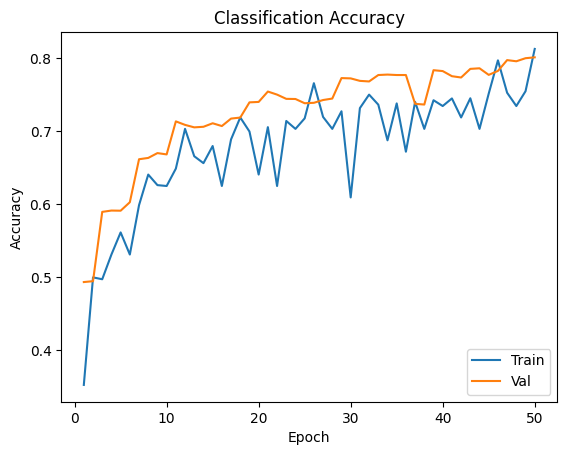

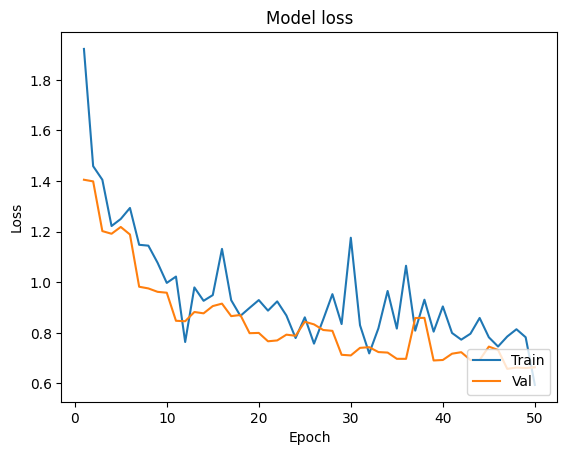

In [20]:
results(model)

In [23]:
from random import randint
def saveModel(model, history: dict, dir_prefix: str = r"../NoteBook/NonDistilledStudent", dir_output:str=r"NonDistilledStudent-1"):
    """
    Creates a directory and saves the model in .h5 format, training history as a JSON file,
    and training and test datasets as .npy files.

    Args:
    model (tf.keras.Model): The trained Keras model to save.
    history (dict): Dictionary containing the training history.
    x_test, y_test, x_train, y_train (numpy.ndarray): Datasets to save.
    output_dir (str, optional): The directory to save all files. Defaults to "TeacherModel".

    Returns:
    bool: True if all files are saved successfully, False if an error occurs.
    """
    try:        
    # Create the directory if it does not exist
        dir_path = os.path.join(dir_prefix, dir_output)
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
            
        history_path = os.path.join(dir_path, "history.json")
        with open(history_path, 'w') as f:
            f.write(json.dumps(history,indent=4))
            f.close()

        model_path = os.path.join(dir_path, "model.keras")
        model.save(model_path)
        

        return True
    except Exception as e:
        print(type(e))
        print(f"An error occurred: {e}")
        
        return False


In [24]:
# print(history.history)
index = 5
print(saveModel(model,history.history,dir_output=f"NonDistilledStudent-{index}"))

True
